#Grupo:

*   Marcelo Leopoldino dos Santos
*   Ramon Leôncio


## Análise 3


Fonte de dados: visitas.csv
Este banco contém as visitas que um cliente realizou a um site de compra.

Colunas:
id_visita: Identificação da visita
id_cliente: Identificação do cliente

Fonte de dados: receita.csv
Este banco contém a receita de produtos comprados durante a visita de um usuário.

Colunas:
id_visita: Identificação da visita
receita: Receita gera pelos produtos comprados naquela visita.

Realizar os seguintes processos de análises:

1- Unifique os dois dataframes em um utilizando o campo id_visita, preencha os dados faltantes com valor 0.

In [2]:
## Analise 3

#Exercicio 1

import pandas as pd
import matplotlib.pyplot as plt
from os import chdir # Comentar caso não utilize o Colab

##Acesso as pastas do GDrive
#from google.colab import drive #Comentar caso não utilize o Colab
#drive.mount('/content/gdrive') #Comentar caso não utilize o Colab
#
##Configurando caminho de acesso as pastas do GDrive no Colab (adicionar o caminho completo)
#chdir('/content/gdrive/My Drive/University/PUC-MG/IA/Python/Notebooks/Analise3') #Comentar caso não utilize o Colab

#Importando os arquivos
df1 = pd.read_csv('visitas.csv')
df2 = pd.read_csv('receita.csv')

print(df1.head())
print(df2.head())

# Unificando os DataFrames
df_merged = df1.merge(df2, on='id_visita', how='outer').fillna(0)

print(df_merged)


   id_cliente id_visita
0        1741   ehk5182
1        4352   fzl5743
2        8575   qlx5758
3        7225   dtp4776
4        4457   zji2851
  id_visita  receita
0   pch1227  3557.05
1   dep1756     4.80
2   ten1521   280.11
3   ahk6325     4.20
4   jwa3254     6.73
        id_cliente id_visita  receita
0             1741   ehk5182     0.00
1             4352   fzl5743     0.00
2             8575   qlx5758     0.00
3             7225   dtp4776  2597.99
4             4457   zji2851     0.00
...            ...       ...      ...
993073        4327   ddg7364     0.00
993074        6323   bhk3281  1832.91
993075        7441   rfm1384     0.00
993076        3738   gwz2627     0.00
993077        6315   gqn6744    93.84

[993078 rows x 3 columns]


2- Calcule as descritivas a seguir por id_cliente:

a. Média incluindo visitas sem receita

b. Média excluindo visitas sem receita

c. Percentual de visitas com receita

In [3]:
#Exercicio 2

# a. Média incluindo visitas sem receita
media_com_zeros = df_merged.groupby('id_cliente')['receita'].mean()

# b. Média excluindo visitas sem receita
media_sem_zeros = df_merged[df_merged['receita'] > 0].groupby('id_cliente')['receita'].mean()

# c. Percentual de visitas com receita
total_visitas = df_merged.groupby('id_cliente').size()
visitas_com_receita = df_merged[df_merged['receita'] > 0].groupby('id_cliente').size()
percentual_visitas_com_receita = (visitas_com_receita / total_visitas) * 100

print("a. Média incluindo visitas sem receita:")
print(media_com_zeros)
print("\nb. Média excluindo visitas sem receita:")
print(media_sem_zeros)
print("\nc. Percentual de visitas com receita:")
print(percentual_visitas_com_receita)


a. Média incluindo visitas sem receita:
id_cliente
1111     52.174383
1112     82.266157
1113    107.288046
1114     67.600250
1115    110.904764
           ...    
8884     38.639961
8885     89.166338
8886     91.069057
8887     51.585422
8888     86.603333
Name: receita, Length: 4096, dtype: float64

b. Média excluindo visitas sem receita:
id_cliente
1111     613.049000
1112     753.558000
1113     800.062286
1114     676.002500
1115    1083.454231
           ...     
8884     620.654375
8885    1460.956154
8886     877.574545
8887     676.040526
8888    1011.891579
Name: receita, Length: 4096, dtype: float64

c. Percentual de visitas com receita:
id_cliente
1111     8.510638
1112    10.917031
1113    13.409962
1114    10.000000
1115    10.236220
          ...    
8884     6.225681
8885     6.103286
8886    10.377358
8887     7.630522
8888     8.558559
Length: 4096, dtype: float64


3- Crie um algoritmo que faça os seguintes passos:

Para B indo de 1 até 1000:

1. Gere uma amostra (com reposição) do dataframe original. (df.sample(n=”tamanho do
banco”, replace=True))
2. Calcule a média de receita da amostra (considerando visitas sem receita)
3. Armazene esse valor em uma lista com o valor de B e uma lista com os valores de média.

Criar um DataFrame utilizando essas listas.

In [4]:
#Exercicio 3
lista_b = []
lista_media_amostras = []
for b in range(1, 1001):
    df_sample = df_merged.sample(n=df_merged.shape[0], replace=True)

    media_com_zeros = df_sample.groupby('id_cliente')['receita'].mean()
    media = media_com_zeros.mean()

    lista_b.append(b)
    lista_media_amostras.append(media)

print(lista_b)
print(lista_media_amostras)
    
#Create a df with the lists
df_media_amostrada = pd.DataFrame(list(zip(lista_b, lista_media_amostras)), columns =['b', 'media_amostrada'])
print(df_media_amostrada)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 22

4- Crie uma visualização para a distribuição da coluna media_amostrada no passo 3.

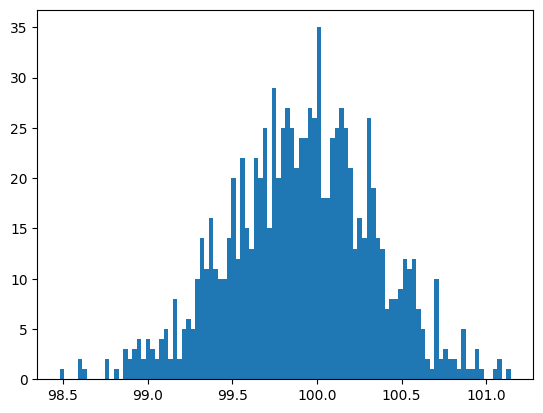

In [7]:
# Exercicio 4
#Plot the distributionof the column media_amostrada
plt.hist(df_media_amostrada['media_amostrada'], bins=100)
plt.show()
